In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the data
df = pd.read_json("Test/ergometer_500m.json")

In [3]:
# Define target variable (e.g., speed) and features (time)
X = df['split_time'].values.reshape(-1, 1)  # Time as the independent variable
# Calcul de la vitesse en km/h (distance en km / temps en heures)
df['split_time_hours'] = df['split_time'] / 3600  # Conversion du temps en heures
df['speed_kmh'] = (0.5 / df['split_time'])*3600  # La distance est de 0.5 km (500m)
y = df['speed_kmh'].values  # Speed as the dependent variable

In [4]:
len(X)

128

In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

# Load your data
df = pd.read_json("Test/ergometer_500m.json")

# Define target variable (e.g., speed) and features (time)
X = df['split_time'].values.reshape(-1, 1)  # Time as the independent variable

# Calculate speed in km/h (distance in km / time in hours)
df['split_time_hours'] = df['split_time'] / 3600  # Convert time to hours
df['speed_kmh'] = (0.5 / df['split_time_hours'])  # Distance is 0.5 km (500m)

y = df['speed_kmh'].values  # Speed as the dependent variable

# Use KNeighborsRegressor instead of KNeighborsClassifier
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y)

# Predict speeds for new split times (you can input new data here)
predicted_speeds = neigh.predict(X)

# Display some predictions
for actual, predicted in zip(y[:5], predicted_speeds[:5]):
    print(f"Actual Speed: {actual:.2f} km/h, Predicted Speed: {predicted:.2f} km/h")

Actual Speed: 15.08 km/h, Predicted Speed: 15.09 km/h
Actual Speed: 14.85 km/h, Predicted Speed: 14.86 km/h
Actual Speed: 14.85 km/h, Predicted Speed: 14.86 km/h
Actual Speed: 15.58 km/h, Predicted Speed: 15.59 km/h
Actual Speed: 15.68 km/h, Predicted Speed: 15.66 km/h


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Discretize speed into categories (e.g., low, medium, high speed)
bins = np.linspace(0, 20, 5)
df['speed_category'] = pd.cut(df['speed_kmh'], bins=[0, 15, 17.5, 20], labels=['slow', 'medium', 'fast'])

X = df['split_time'].values.reshape(-1, 1)  # Time as feature
y = df['speed_category'].values  # Speed categories as the target variable

# Create and fit the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Predict speed categories based on the time
predicted_categories = model.predict(X)
print(f"Predicted categories: {predicted_categories}")

Predicted categories: ['medium' 'slow' 'slow' 'medium' 'medium' 'slow' 'slow' 'medium' 'medium'
 'slow' 'slow' 'slow' 'medium' 'slow' 'slow' 'slow' 'medium' 'slow' 'slow'
 'medium' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'medium'
 'slow' 'slow' 'medium' 'medium' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'medium' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'fast' 'fast' 'fast' 'fast' 'medium' 'medium' 'medium' 'medium'
 'medium' 'slow' 'medium' 'medium' 'slow' 'slow' 'slow' 'medium' 'fast'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow']


In [8]:
y

['medium', 'slow', 'slow', 'medium', 'medium', ..., 'slow', 'slow', 'slow', 'slow', 'slow']
Length: 128
Categories (3, object): ['slow' < 'medium' < 'fast']

In [10]:
predicted_categories==y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Discretize speed into categories (e.g., low, medium, high speed)
bins = np.linspace(0, 20, 5)
df['speed_category'] = pd.cut(df['speed_kmh'], bins=[0, 15, 17.5, 20], labels=['slow', 'medium', 'fast'])

X = df['split_time'].values.reshape(-1, 1)  # Time as feature
y = df['speed_category'].values  # Speed categories as the target variable

# Create and fit the model
model = LogisticRegression()
model.fit(X, y)

# Predict speed categories based on the time
predicted_categories = model.predict(X)
print(f"Predicted categories: {predicted_categories}")

Predicted categories: ['medium' 'slow' 'slow' 'medium' 'medium' 'slow' 'slow' 'medium' 'medium'
 'slow' 'slow' 'slow' 'medium' 'slow' 'slow' 'slow' 'medium' 'slow' 'slow'
 'medium' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'medium'
 'slow' 'slow' 'medium' 'medium' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'medium' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'fast' 'fast' 'fast' 'fast' 'medium' 'medium' 'medium' 'medium'
 'medium' 'slow' 'medium' 'medium' 'slow' 'slow' 'slow' 'medium' 'fast'
 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow' 'slow'
 'slow' 'slow' 'slow' 'slow']


In [16]:
predicted_categories==y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]

In [19]:
from sklearn.linear_model import LinearRegression

# Define feature (X) and target (y)
X = df['split_time'].values.reshape(-1, 1)  # Time as the independent variable
y = df['speed_kmh'].values  # Speed as the dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict speed based on the time
predicted_speed = model.predict(X)
print(f"Predictions: {predicted_speed}")

Predictions: [15.22245476 15.01932643 15.01932643 15.66256614 15.74156049 14.53407543
 14.55664524 15.36915855 15.31273402 14.54536033 13.94726026 14.42122636
 15.25630948 14.00368479 14.09396405 14.54536033 15.22245476 15.08703587
 15.1208906  15.40301327 15.03061134 13.91340554 13.42815453 13.51843379
 14.22938294 13.5297187  12.66078085 13.80055647 13.90212063 12.96547334
 12.5817865  12.60435631 13.66513758 13.01061297 12.40122799 12.81876955
 13.13474695 11.9385468  11.83698263 11.97240152 12.44636762 11.67899393
 11.58871468 11.7805581  10.44893906  9.8734088  10.31352018 11.12603349
 15.96725863 14.89519245 14.8049132  15.52714725 15.63999632 14.74848866
 14.63563959 14.94033208 14.60178487 14.30837728 14.15038859 14.26323766
 14.59049996 13.61999795 13.24759602 13.87955082 15.34658874 14.63563959
 14.03753951 14.11653386 13.99239989 13.56357342 13.66513758 13.78927156
 13.64256777 11.70156375 11.18245802 12.02882605 12.62692613 11.52100523
 11.6225694  11.35173163 17.23116822 1

In [20]:
predicted_speed==y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

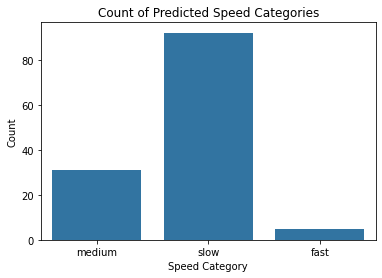

In [7]:
# Create a bar plot for the count of each predicted category
sns.countplot(x=predicted_categories)
plt.title('Count of Predicted Speed Categories')
plt.xlabel('Speed Category')
plt.ylabel('Count')
plt.show()

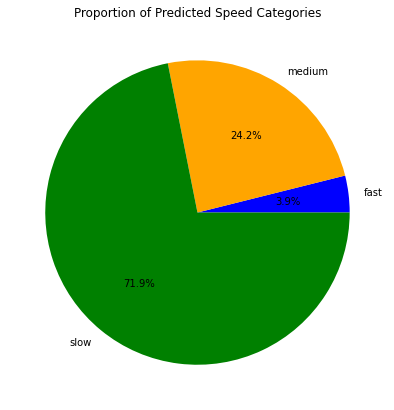

In [80]:
plt.figure(figsize=(7, 7))
plt.pie([list(predicted_categories).count('fast'), list(predicted_categories).count('medium'),list(predicted_categories).count('slow')],
        labels=['fast', 'medium','slow'], autopct='%1.1f%%', colors=['blue', 'orange','green'])
plt.title('Proportion of Predicted Speed Categories')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


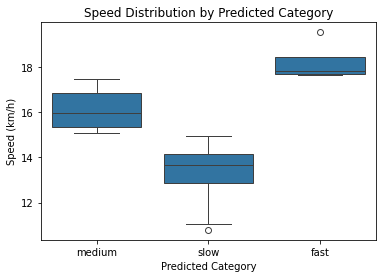

In [81]:
# Assuming 'df' contains a column 'speed_kmh' and 'predicted_categories'
df['predicted_category'] = predicted_categories

sns.boxplot(x='predicted_category', y='speed_kmh', data=df)
plt.title('Speed Distribution by Predicted Category')
plt.xlabel('Predicted Category')
plt.ylabel('Speed (km/h)')
plt.show()

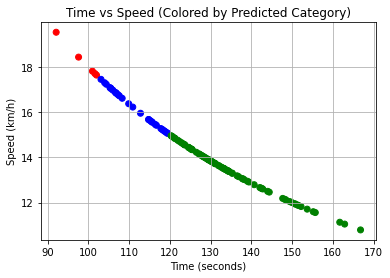

In [83]:
plt.scatter(df['split_time'], df['speed_kmh'], c=df['predicted_category'].map({'fast': 'red', 'medium': 'blue', 'slow': 'green'}))
plt.title('Time vs Speed (Colored by Predicted Category)')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (km/h)')
plt.grid(True)
plt.show()